<a href="https://colab.research.google.com/github/scapolingua/Deep-Learning/blob/master/ElettrodomesticiML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

         Data    Ora  Frigorifero  Lavatrice  Lavastoviglie  Televisore Sala  \
0  2025-01-01  00:00         0.67        0.0            0.0             0.27   
1  2025-01-01  00:10         0.74        0.0            0.0             0.18   
2  2025-01-01  00:20         0.68        0.0            0.0             0.27   
3  2025-01-01  00:30         0.61        0.0            0.0             0.16   
4  2025-01-01  00:40         0.86        0.0            0.0             0.14   

   Luci Cucina  Luci Camera da Letto 1  Luci Camera da Letto 2  Luci Bagno  \
0          0.0                     0.0                     0.0         0.0   
1          0.0                     0.0                     0.0         0.0   
2          0.0                     0.0                     0.0         0.0   
3          0.0                     0.0                     0.0         0.0   
4          0.0                     0.0                     0.0         0.0   

   Luci Soggiorno  Televisore Camera da Letto  For

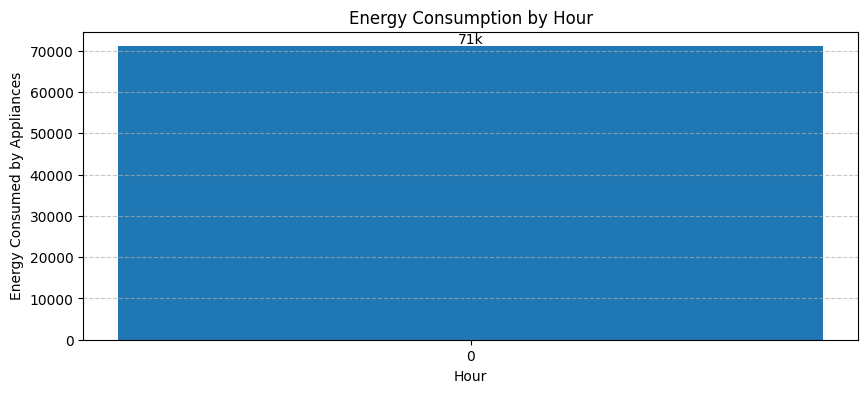

   day_of_week  Totale Consumo
6            6        11514.83
2            2        10599.96
4            4        10405.57
5            5         9639.75
1            1         9636.29
3            3         9630.77
0            0         9630.32


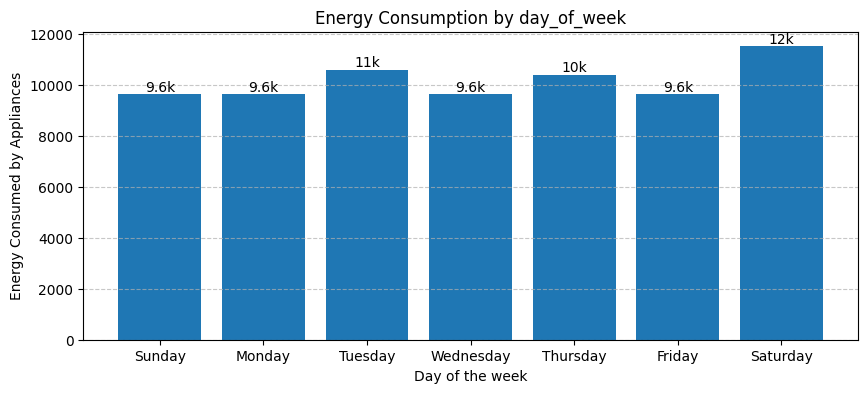

In [ ]:
'''
Funziona crea le Machine Learning e le applica a un dataset
ma il dataset non è quello degli elettrodomestici
si basa su un dataset che contiene dati sui consumi
di luce e calore in varie stanze in base all'umidità
Crea anche il modello previsionale
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')

# read dataset from csv file
#data = pd.read_csv('dataset/energydata_complete.csv')
data = pd.read_excel('dataset/consumi_elettrodomestici.xlsx')
# load the dataset
#data_target = pd.read_csv('dataset/ energydata_complete.csv', usecols=[1], engine='python')
data_target = pd.read_excel('dataset/consumi_elettrodomestici.xlsx',usecols=['Totale Consumo'])
# set standard color variable
color = "#1f77b4"

# display first few lines to make sure correctly import
print(data.head())

'''
Variables Description：

T1: Temperature in kitchen area, in Celsius
T2: Temperature in living room area, in Celsius
T3: Temperature in laundry room area, in Celsius
T4: Temperature in office room, in Celsius
T5: Temperature in bathroom, in Celsius
T6: Temperature outside the building (north side), in Celsius
T7: Temperature in ironing room , in Celsius
T8: Temperature in teenager room 2, in Celsius
T9: Temperature in parents room, in Celsius
RHI: Humidity in kitchen area, in %
RH2: Humidity in living room area, in %
RH3: Humidity in laundry room area, in %
RH4: Humidity in office room, in %
RH5: Humidity in bathroom, in %
RH6: Humidity outside the building (north side), in %
RH7: Humidity in ironing room, in %
RH8: Humidity in teenager room 2,in %
RH9: Humidity in parents room, in %
To: Temperature outside (from Chievres weather station), in Celsius
Pressure: (from Chievres weather station), in mm Hg
Hg RHout: Humidity outside (from Chievres weather station), in %
Wind speed: (from Chievres weather station), in m/s
Visibility: (from Chievres weather station), in km
Tdewpoint: (from Chievres weather station), A*C
Appliances, energy use in Wh: Dependent variable
'''

print(data.shape)
print(data.dtypes)

#Check if missing values
print(data.isnull().sum())

# Check if we have any duplicated data
print(any(data.duplicated()))

# Convert 'date' column to datetime format, so that we could use it for analyse with time series functionality
data['date'] = pd.to_datetime(data['Data'])

# Copy dataset for time-based analysis
new_data = data.copy()
print(new_data)

# Converting date into datetime
new_data['date'] = new_data['date'].astype('datetime64[ns]')
new_data['Date'] = pd.to_datetime(new_data['date']).dt.date
new_data['Time'] = pd.to_datetime(new_data['date']).dt.time
new_data['hour'] = new_data['date'].dt.hour
new_data['month'] = new_data['date'].dt.month
new_data['day_of_week'] = new_data['date'].dt.dayofweek

new_data= new_data.drop(["date"], axis=1)
print(new_data)

# Calculate the total energy consumed by the appliance per hour
app_hour = new_data.groupby(by='hour',as_index=False)['Totale Consumo'].sum()
# Sort app_hour by descending order
#print(app_hour.sort_values(by='Appliances',ascending=False))

print(app_hour.sort_values(by='Totale Consumo',ascending=False))

# Function to format the numerical value to 'k' format
def format_value(value):
    if value < 1000:
        return f"{value:.0f}"
    elif value < 10000:
        return f"{value/1000:.1f}k"
    else:
        return f"{value/1000:.0f}k"

# Plotting the data
plt.figure(figsize=(10, 4))  # Set the figure size
bars = plt.bar(app_hour['hour'], app_hour['Totale Consumo'], color=color)  # Create a bar plot

# Add numerical values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, format_value(height), ha='center', va='bottom')

plt.xlabel('Hour')  # Set the x-axis label
plt.ylabel('Energy Consumed by Appliances')  # Set the y-axis label
plt.title('Energy Consumption by Hour')  # Set the title
plt.xticks(app_hour['hour'])  # Set the x-axis ticks to match the hours
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines to the y-axis
plt.show()  # Show the plot

# Calculate the total energy consumed by the appliance per hour
app_week_day = new_data.groupby(by='day_of_week',as_index=False)['Totale Consumo'].sum()
# Sort app_hour by descending order
print(app_week_day.sort_values(by='Totale Consumo',ascending=False))

day_names = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 0: 'Sunday'}

# Plotting the data
plt.figure(figsize=(10, 4))  # Set the figure size
bars = plt.bar(app_week_day['day_of_week'], app_week_day['Totale Consumo'], color=color)  # Create a bar plot

# Add numerical values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, format_value(height), ha='center', va='bottom')

plt.xlabel('Day of the week')  # Set the x-axis label
plt.ylabel('Energy Consumed by Appliances')  # Set the y-axis label
plt.title('Energy Consumption by day_of_week')  # Set the title
plt.xticks(list(day_names.keys()), list(day_names.values()))
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines to the y-axis
plt.show()  # Show the plot

#--------------------
# Filter columns excluding 'rv1' and 'rv2'
selected_columns = [col for col in data.columns[2:] if col not in ['rv1', 'rv2']]

# Determine the number of rows needed for the subplots
num_cols = len(selected_columns)
num_rows = (num_cols - 1) // 5 + 1

# Create subplots
fig, axs = plt.subplots(num_rows, 5, figsize=(14, num_rows*4))

# Loop through selected columns and plot time series on subplots
for i in range(num_rows):
    for j in range(5):
        index = i * 5 + j
        if index < num_cols:
            var = selected_columns[index]
            sns.lineplot(y=data[var], x=data['date'], ax=axs[i,j], linewidth=1.5)
            axs[i,j].set_xlabel('Date')
            axs[i,j].set_ylabel(var)
            axs[i,j].set_title('{} Time Series Data'.format(var))
            axs[i,j].tick_params(axis='x', rotation=90)
        else:
            axs[i,j].axis('off')

plt.tight_layout()
plt.show()



In [ ]:

# Extracting numerical columns from the data
'''
numerical = ['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3',
             'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
             'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out',
             'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']
'''

numerical= ['Frigorifero','Lavatrice','Lavastoviglie',
            'Televisore Sala','Luci Cucina',
            'Luci Camera da Letto 1','Luci Camera da Letto 2','Luci Bagno',
            'Luci Soggiorno','Televisore Camera da Letto','Forno a Microonde',
            'Forno','Totale Consumo']


# Create subplots
fig, axs = plt.subplots(4, 4, figsize=(14, 10))

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Loop through each numerical column and plot its distribution
for i, col in enumerate(numerical):
    ax = axs[i]
    sns.boxplot(x=data['date'].dt.month, y=data[col], ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Month')
    ax.set_ylabel('Value')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:

# Creating subplots
fig, axs = plt.subplots(4, 4, figsize=(14, 10))

# Counter for accessing columns
cpt = 0

# Looping through subplots and plotting histograms for each numerical column
for i in range(4):
    for j in range(3):
        var = numerical[cpt]
        axs[i,j].hist(data[var].values, rwidth=0.9)
        axs[i,j].set_title(var)
        cpt += 1

fig.suptitle('Independent Variable Distribution')

# Adjusting layout and displaying the plot
plt.tight_layout()
plt.show()

# Plot the relationship between 'date' and 'Appliances'
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(data['date'], data['Totale Consumo'], color='#1f77b4',  linestyle='-')  # Plot with markers
plt.title('Relationship between Date and Appliances')
plt.xlabel('Date')
plt.ylabel('Appliances (Wh)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


# Calculating the simple moving averages (SMA) of the 'Appliances' column in the data DataFrame using different window sizes
window_size_1 = 100
window_size_2 = 200
window_size_3 = 500
sma_1 = data['Totale Consumo'].rolling(window=window_size_1).mean() # get the mean in the time span of 100 past data entries
sma_2 = data['Totale Consumo'].rolling(window=window_size_2).mean() # get the mean in the time span of 200 past data entries
sma_3 = data['Totale Consumo'].rolling(window=window_size_3).mean() # get the mean in the time span of 300 past data entries

# Draw the plt
plt.figure(figsize=(10, 6))
plt.plot(data['date'], data['Totale Consumo'], label='Original Data')
plt.plot(data['date'], sma_1, label='SMA (window size = {})'.format(window_size_1))
plt.plot(data['date'], sma_2, label='SMA (window size = {})'.format(window_size_2))
plt.plot(data['date'], sma_3, label='SMA (window size = {})'.format(window_size_3))
plt.xlabel('Date')
plt.ylabel('Appliances')
plt.title('Simple Moving Average')
plt.legend()

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

plt.show()


In [ ]:

import random

len_weekly_data = 6*24*7 # 10 entries per minute => 6 times per hour => * 24 h * 7 days

# Function to randomly select 8 different weeks from the entire time range
def select_random_weeks(data):
    # Determine the total number of complete weeks
    num_weeks = len(data) // len_weekly_data
    # Randomly select 8 different week indices
    random_week_indices = random.sample(range(num_weeks), 8)
    # Sort the selected week indices
    random_week_indices.sort()
    return random_week_indices

# Randomly select 8 different weeks
random_week_indices = select_random_weeks(data)

# Create subplots arranged in a 4x2 grid
fig, axs = plt.subplots(4, 2, figsize=(10, 12))
fig.suptitle('Visualization of Randomly Selected Weekly Appliances Data')

# Plotting each randomly selected week's data
for i in range(4):
    for j in range(2):
        # Calculate the start and end index for the randomly selected week
        start_index = random_week_indices[i * 2 + j] * len_weekly_data
        end_index = start_index + len_weekly_data

        # Filter data for the randomly selected week
        week_data = data.iloc[start_index:end_index]

        # Plotting the relationship between 'date' and 'Appliances' for the randomly selected week
        axs[i, j].plot(week_data['date'], week_data['Totale Consumo'], color='#1f77b4', linestyle='-')
        axs[i, j].set_title(f'Week {random_week_indices[i * 2 + j] + 1}')
        axs[i, j].set_xlabel('Date')
        axs[i, j].set_ylabel('Appliances (Wh)')
        axs[i, j].tick_params(axis='x', rotation=45)
        axs[i, j].grid(True)

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()
plt.show()

# Plotting the histogram for the "Appliances" column
plt.figure(figsize=(10, 4))  # Setting the figure size
bin_width = 25  # Define the bin width
max_value = int(max(data['Totale Consumo']))
bins = range(0, max_value + bin_width, bin_width)  # Define the bins with a gap of 50 units starting from 0
plt.hist(data['Totale Consumo'], bins=bins, color='#1f77b4', edgecolor='white')  # Plotting histogram with specified bins
plt.title('Distribution of Appliances')  # Adding title
plt.xlabel('Appliances (Wh)')  # Adding x-axis label
plt.ylabel('Frequency')  # Adding y-axis label
plt.grid(True)  # Adding gridlines
plt.tight_layout()  # Adjusting layout to prevent clipping of labels
plt.show()  # Displaying the plot

data.boxplot(column='Totale Consumo', vert=False, figsize=(10, 4))

# Add title and labels
plt.title('Horizontal Box Plot of Appliances')
plt.xlabel('Value')
plt.ylabel('Appliances')

# Show the plot
plt.show()


In [ ]:

# Delete date time stamps and irrelavant columns
#new_data = new_data.drop(['Date', 'Time', 'rv1', 'rv2'], axis=1)
new_data = new_data.drop(['Data'], axis=1)

# Auto-check if there is any format that is not 'float64' or 'int64'
for column in new_data.columns:
    if new_data[column].dtype != 'float64' and new_data[column].dtype != 'int64':
        print(f"Column '{column}' has non-numeric data type: {new_data[column].dtype}")

# We can see from above that the 'hour' 'month' and 'day_of_week' is of data type 'int32', which cannot be used for correlation analysis
# We should change the format first.

# Assuming 'Ora' contains time values, and you want to extract the hour.
new_data['Ora'] = pd.to_datetime(new_data['Ora'], format='%H', errors='coerce').dt.strftime('%H:%M:%S') # Convert to datetime and then format
#new_data['Ora'] = pd.to_datetime(new_data['Ora'], errors='coerce').dt.hour # try to extract the hour from the Ora column


# Change the format to float.
new_data['Ora'] = new_data['Ora'].astype(float)
#new_data['Ora'] = new_data['Ora'].str.split(':').str[0].astype(float)
new_data['month'] = new_data['month'].astype(float)
new_data['day_of_week'] = new_data['day_of_week'].astype(float)

# Check type again.
print(new_data.dtypes)

# Calculate correlation coefficients
correlations = new_data.corr()['Totale Consumo'].drop(['Totale Consumo'])

# Plotting the correlations
plt.figure(figsize=(15, 6))

# Define colors based on correlation values
colors = ['red' if corr < 0 else '#1f77b4' for corr in correlations]

# Plot the bar chart with custom colors
bars = correlations.plot(kind='bar', color=colors)

# Add text annotations
for i, corr in enumerate(correlations):
    if corr < 0:
        plt.text(i, corr, f"{corr:.2f}", ha='center', va='top', fontsize=8)
    else:
        plt.text(i, corr, f"{corr:.2f}", ha='center', va='bottom', fontsize=8)

plt.title('Correlation with Appliances')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:

# Calculate pairwise correlations
corr_matrix = new_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)

plt.title('Pairwise Correlation Heatmap')
plt.show()

In [ ]:

# Selecting features for clustering (excluding 'Appliances' since it's the target feature) that with an abstract value of over 0.06.
#data_cluster = new_data[['Appliances','lights','T2','RH_2','T3','T6','RH_6','RH_7','RH_8','T_out','Press_mm_hg','RH_out','hour']]

data_cluster = new_data[['Frigorifero','Lavatrice','Lavastoviglie',
            'Televisore Sala','Luci Cucina',
            'Luci Camera da Letto 1','Luci Camera da Letto 2','Luci Bagno',
            'Luci Soggiorno','Televisore Camera da Letto','Forno a Microonde',
            'Forno','Totale Consumo']]
print(data_cluster)

scaler = StandardScaler()
data_cluster_scaled = scaler.fit_transform(data_cluster)


from sklearn.cluster import KMeans

# Create a KMeans analyzer
kmeans = KMeans(n_clusters=5, random_state=42)

# Run the KMeans analysis
kmeans.fit(data_cluster_scaled)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the 'cluster' column to the DataFrame
data_cluster['cluster'] = cluster_labels

# Print the size of each cluster
for cluster_label in range(5):
    cluster_size = len(cluster_labels[cluster_labels == cluster_label])
    print(f"Cluster {cluster_label}: {cluster_size} data points")
# Create a subplot grid containing all features
fig, axs = plt.subplots(3, 4, figsize=(16, 12))

# Flatten axs into a 1D array for iteration
axs = axs.flatten()

# Get the names of all feature columns except the target variable 'Appliances'
feature_columns = data_cluster.columns.drop('Totale Consumo')

# Plot scatter plot of each feature against the target variable 'Appliances' and color by cluster
for i, feature in enumerate(feature_columns):
    # Check if the subplot index is within bounds
    if i < len(axs):
        sns.scatterplot(x=feature, y='Appliances', hue='cluster', data=data_cluster, ax=axs[i], alpha=0.5, palette='Blues')
        axs[i].set_xlabel(feature)
        axs[i].set_ylabel('Appliances')
        axs[i].legend(title='Cluster')

plt.suptitle('Scatter Plots of Features against Appliances with Cluster Information', fontsize=16)

# Adjust spacing and layout of subplots
plt.tight_layout()
plt.show()


In [ ]:
#-----------ARIMA MODEL

from sklearn.preprocessing import MinMaxScaler
print("---------Data target",data_target.values)

dataset = data_target.values
dataset = dataset.astype('float32')

# normalize the dataset for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
from matplotlib import pyplot

# Prepare data to be trained. Here we just use the target feature 'Appliances' together with the time feature 'date'
data_arima = data[['Totale Consumo', 'date']]
data_arima = data_arima.set_index('date')

decomp_period  = 6*24*7 # Assuming data is sampled every 10 minutes -- 1 week

# Use the lib to decompose a time series into its constituent components: trend, seasonality, and residuals
result = seasonal_decompose(data_arima, period=decomp_period, model='additive')
rcParams['figure.figsize'] = 12, 12
fig = result.plot()
pyplot.show()

# Explicitly store the result's attribute to new variables.
residual = result.resid
seasonal = result.seasonal
trend = result.trend

# Checking if there are any null values.
print(residual.isnull().values.any())

# dopping NaN values
residual.dropna(inplace=True)

print(residual.head())

from statsmodels.tsa.stattools import acf, pacf

# Calculating the autocorrelation function (ACF) of the residuals with a lag of 20
acf_cases = acf(residual, nlags = 20)

# Calculating the partial autocorrelation function (PACF) of the residuals with a lag of 20 using the OLS (Ordinary Least Squares) method
pacf_cases = pacf(residual, nlags = 20, method = 'ols')

rcParams['figure.figsize'] = 12, 4
plt.subplot(121)
plt.plot(acf_cases)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(residual)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(residual)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(pacf_cases)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(residual)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(residual)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(10, 4))  # Set the figure size

plot_acf(residual, lags = 40)
plt.ylim(0, 1.2)  # set the range of Y axis

plt.figure(figsize=(10, 4))  # Set the figure size
plot_pacf(residual, lags = 40)
plt.ylim(-0.2, 1.2)  # set the range of Y axis


In [ ]:
#LSTM model implementing

# LSTM for international airline passengers problem with time step regression framing
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error

# Function to convert an array of values into a dataset matrix, default look back set to 1.
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)
# Fix random seed for reproducibility
tf.random.set_seed(7)

# Reshape into X=t and Y=t+1
look_back = 3 # explicitly set look back value
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

#3.3 Machine Learning Methods
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split


x = data.drop(['Totale Consumo'],axis=1)
y = data['Totale Consumo'] # set target feature


# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 2 models
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)

#4.1 ARIMA model training
from statsmodels.tsa.arima.model import ARIMA

# Define ARIMA model, with p, d, q as 3, 0, 3
model_AR = ARIMA(residual, order=(3, 0, 3), freq='10T')

# Fit model
results_AR = model_AR.fit() # 10 mins per capture
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# from previous tests, I have already know that after ephochs 3, the loss rate will tend to be mininum. So choose 3 as our epochs.
model.fit(trainX, trainY, epochs=3, batch_size=1, verbose=2)

# 4.3 Random Forest model training
#-----------
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid
params = {'n_estimators': [100,200,500],'max_depth':[3,5,8]}

# Reduce the number of folds for cross-validation
folds = 3

# Use RandomizedSearchCV instead of GridSearchCV
model_cv_1 = RandomizedSearchCV(estimator=rf,
                                param_distributions=params,
                                scoring='neg_mean_absolute_error',
                                cv=folds,
                                return_train_score=True,
                                n_iter=10,  # Number of parameter settings sampled
                                verbose=1,
                                n_jobs=-1)

# Fit the model
model_cv_1.fit(x_train, y_train)

# GradientBoostingRegressor
params = {'max_depth': [1,2,3]}

# cross validation
folds = 3
model_cv_2 = GridSearchCV(estimator = gb,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

model_cv_2.fit(x_train, y_train)


# ARIMA
plt.figure(figsize=(10, 6))  # Set the figure size

# Draw the outcome
plt.plot(residual, label='Actual')
plt.plot(results_AR.fittedvalues, color='red', label='Predicted')
plt.xlabel("Date")
plt.ylabel("Residual")
plt.legend(loc="best")

# Final Predictions

# We choose a later period of time to make predictions.
start_time = "2016-01-15 17:00:00"
end_time = "2016-05-27 18:00:00"
predictions = results_AR.predict(start=start_time, end=end_time, dynamic=False, freq='10T')

# Add back trend + seasonal, or otherwise the whole prediction will be definitely lower than original data
final_predictions = predictions + trend + seasonal
print(final_predictions.shape)


plt.figure(figsize=(10, 6))  # Set the figure size

# Plot original data
plt.plot(data['date'], data_arima['Totale Consumo'], label='Original Data')

# Plot predictions
plt.plot(data['date'], final_predictions, color='red', label='Predictions')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Appliances (Wh)')
plt.title('ARIMA Model Predictions')

# Add legend
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add gridlines

# Show plot
plt.show()


In [ ]:

# LSTM predictions

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Plot baseline and predictions
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(data['date'], data['Appliances'], color='#1f77b4',  linestyle='-', label='Original Data')  # Plot with markers
plt.plot(data['date'], trainPredictPlot, color='red',  linestyle='-', label='Training Predictions')  # Plot with markers
plt.plot(data['date'], testPredictPlot, color='green',  linestyle='-', label='Test Predictions')  # Plot with markers

plt.title('LSTM Model Predictions')
plt.xlabel('Date')
plt.ylabel('Appliances (Wh)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.legend()  # Add legend
plt.show()


#final RandomForestRegressor

rf = RandomForestRegressor(max_depth=8, n_estimators=500,random_state=42)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=8, n_estimators=500, random_state=42)

rf_test_pred = rf.predict(x_test)

# Gradient Boosting Regressor predictions

#final GradientBoostingRegressor

gb = GradientBoostingRegressor(max_depth=5,random_state=42)
gb.fit(x_train, y_train)

print(GradientBoostingRegressor(max_depth=5, random_state=42))

gb_test_pred = gb.predict(x_test)

# ARIMA

data_subset = data_arima['Totale Consumo'][(data_arima.index >= start_time) & (data_arima.index <= end_time)]

# Calculate MAE, RMSE, and MAPE for the combined dataset
mae_ar = np.mean(np.abs(data_subset- final_predictions))
mse_ar = np.mean((data_subset- final_predictions) ** 2)
rmse_ar = np.sqrt(mse_ar)
mape_ar = np.mean(np.abs((data_subset- final_predictions) / data_subset)) * 100

print("Mean Absolute Error (MAE) for ARIMA:", mae_ar)
print("Root Mean Squared Error (RMSE) for ARIMA:", rmse_ar)
print("Mean Absolute Percentage Error (MAPE) for ARIMA:", mape_ar)


# LSTM

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Combine trainPredict and testPredict into a single dataset
combined_predictions = np.concatenate((trainPredict[:,0], testPredict[:,0]))

# Calculate MAE, RMSE, and MAPE for the combined dataset
mae_lstm = mean_absolute_error(np.concatenate((trainY[0], testY[0])), combined_predictions)
rmse_lstm = np.sqrt(mean_squared_error(np.concatenate((trainY[0], testY[0])), combined_predictions))
mape_lstm = np.mean(np.abs((np.concatenate((trainY[0], testY[0])) - combined_predictions) / np.concatenate((trainY[0], testY[0]))) * 100)

print("Mean Absolute Error (MAE) for LSTM:", mae_lstm)
print("Root Mean Squared Error (RMSE) for LSTM:", rmse_lstm)
print("Mean Absolute Percentage Error (MAPE) for LSTM:", mape_lstm)

# Random Forest

# Calculate MAE, RMSE, and MAPE for the combined dataset
mae_rf = metrics.mean_absolute_error(y_test, rf_test_pred)
rmse_rf=np.sqrt(metrics.mean_squared_error(y_test, rf_test_pred))
mape_rf = np.mean(np.abs((y_test - rf_test_pred) / y_test)) * 100

print("Mean Absolute Error (MAE) for RF:", mae_rf)
print("Root Mean Squared Error (RMSE) for RF:", rmse_rf)
print("Mean Absolute Percentage Error (MAPE) for RF:", mape_rf)


#Gradient Boosting

# Calculate MAE, RMSE, and MAPE for the combined dataset
mae_gb = metrics.mean_absolute_error(y_test, gb_test_pred)
rmse_gb=np.sqrt(metrics.mean_squared_error(y_test, gb_test_pred))
mape_gb = np.mean(np.abs((y_test - gb_test_pred) / y_test)) * 100

print("Mean Absolute Error (MAE) for GB:", mae_gb)
print("Root Mean Squared Error (RMSE) for GB:", rmse_gb)
print("Mean Absolute Percentage Error (MAPE) for GB:", mape_gb)





In [ ]:
# Final

import numpy as np
import matplotlib.pyplot as plt

models = ['ARIMA', 'LSTM', 'RF', 'GB']

mae_scores = [mae_ar, mae_lstm, mae_rf, mae_gb]
rmse_scores = [rmse_ar, rmse_lstm, rmse_rf, rmse_gb]
mape_scores = [mape_ar, mape_lstm, mape_rf, mape_gb]

bar_width = 0.25

index = np.arange(len(models))

plt.bar(index - bar_width, mae_scores, bar_width, label='MAE', color='red')

plt.bar(index, rmse_scores, bar_width, label='RMSE', color=color)

plt.bar(index + bar_width, mape_scores, bar_width, label='MAPE', color='skyblue')

for i in range(len(models)):
    plt.text(index[i] - bar_width, mae_scores[i] + 0.01, str(round(mae_scores[i], 2)), ha='center', va='bottom')
    plt.text(index[i], rmse_scores[i] + 0.01, str(round(rmse_scores[i], 2)), ha='center', va='bottom')
    plt.text(index[i] + bar_width, mape_scores[i] + 0.01, str(round(mape_scores[i], 2)), ha='center', va='bottom')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Model Scores')

plt.xticks(index, models)

plt.legend()

plt.show()

Da qui in poi Area di prove varie

In [21]:
print(new_data['Ora'])
type(new_data['Ora'])
new_data['Ora'] = pd.to_datetime(new_data['Ora'], format='%H', errors='coerce').dt.strftime('%H:%M:%S') # Convert to datetime and then format

#new_data['Ora']=new_data['Ora'].strftime('%H:%M:%S')
print(new_data['Ora'])

#new_data['Ora'] = pd.to_datetime(new_data['Ora'], format='%Y%m%d')
#new_data['Ora'] = pd.to_datetime(new_data['Ora'], errors='coerce').dt.hour # try to extract the hour from the Ora column


0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
52555   NaN
52556   NaN
52557   NaN
52558   NaN
52559   NaN
Name: Ora, Length: 52560, dtype: float64
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
52555    NaN
52556    NaN
52557    NaN
52558    NaN
52559    NaN
Name: Ora, Length: 52560, dtype: object
